In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
file_path="/kaggle/input/churn-modelling/Churn_Modelling.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Attributes

- **RowNumber**: Số thứ tự của bản ghi.
- **CustomerId**: Mã số khách hàng.
- **Surname**: Họ của khách hàng.
- **CreditScore**: Điểm tín dụng của khách hàng.
- **Geography**: Quốc gia của khách hàng.
- **Gender**: Giới tính của khách hàng.
- **Age**: Tuổi của khách hàng.
- **Tenure**: Thời gian khách hàng gắn bó với ngân hàng.
- **Balance**: Số dư tài khoản của khách hàng.
- **NumOfProducts**: Số lượng sản phẩm ngân hàng mà khách hàng đang sử dụng.
- **HasCrCard**: Khách hàng có sở hữu thẻ tín dụng hay không.
- **IsActiveMember**: Khách hàng có phải là thành viên hoạt động hay không.
- **EstimatedSalary**: Mức lương ước tính của khách hàng.
- **Exited**: Biến mục tiêu, cho biết khách hàng có rời ngân hàng hay không (1 là có, 0 là không).

# I. Data Exploration

## 1. Check for missing values

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 2. Get summary statistics for numerical features

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


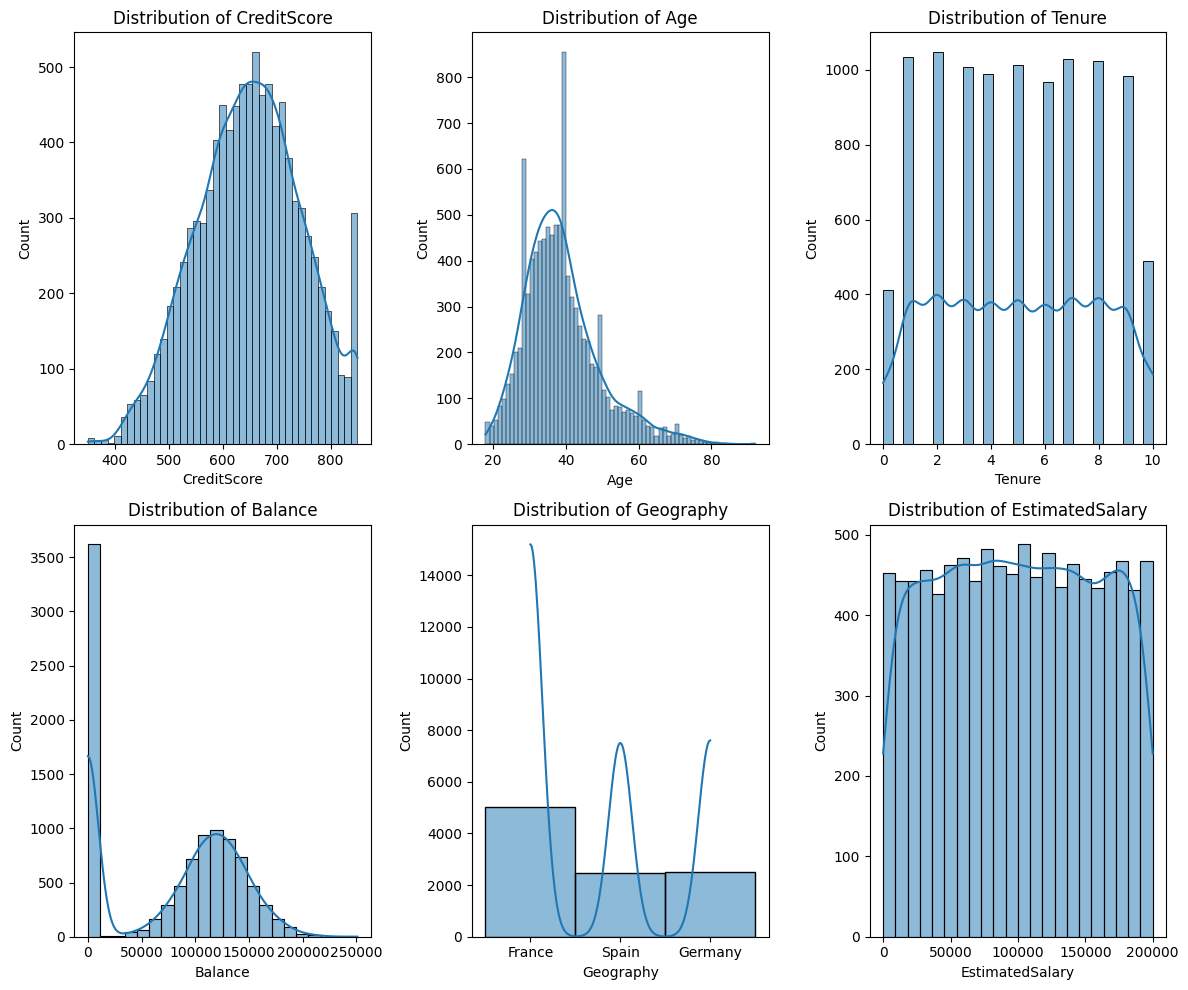

In [5]:
# Visualize the distribution of key numerical features
plt.figure(figsize=(12, 10))

# Select key numerical columns to visualize
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Geography', 'EstimatedSalary']

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 3. Distribution of customers by age & Exited status count by age group

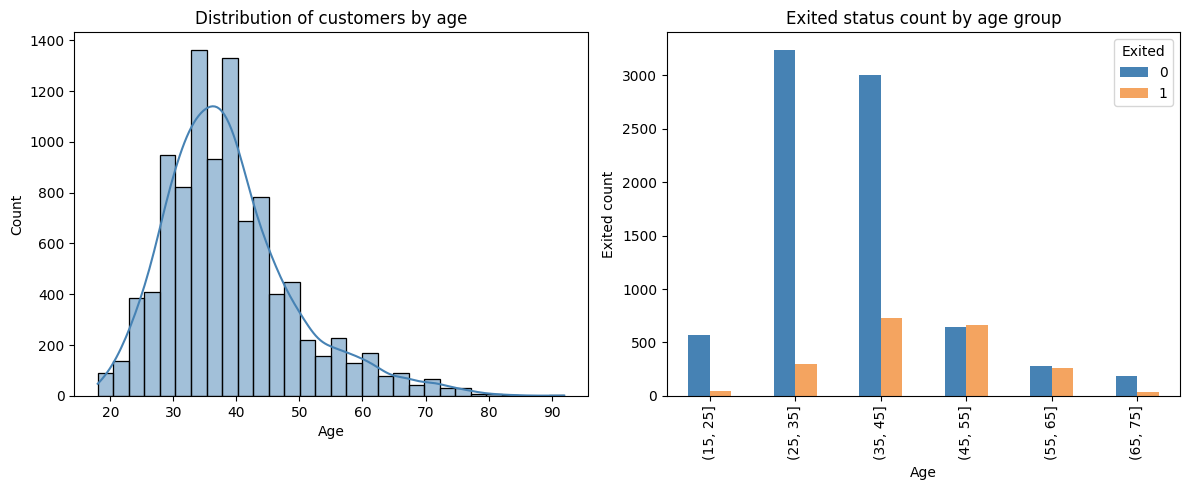

In [6]:
# Part (a): Age Distribution Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of customers by age")
plt.xlabel("Age")
plt.ylabel("Count")

# Part (b): Age Group by Exited Status
age_bins = pd.cut(data['Age'], bins=[15, 25, 35, 45, 55, 65, 75])
age_exit = data.groupby([age_bins, 'Exited']).size().unstack().fillna(0)

# Plotting age group vs. exited status
plt.subplot(1, 2, 2)
age_exit.plot(kind='bar', stacked=False, color=["steelblue", "sandybrown"], ax=plt.gca())
plt.title("Exited status count by age group")
plt.xlabel("Age")
plt.ylabel("Exited count")
plt.legend(title="Exited", labels=["0", "1"])

plt.tight_layout()
plt.show()

## 4. Customer Geography Disribution

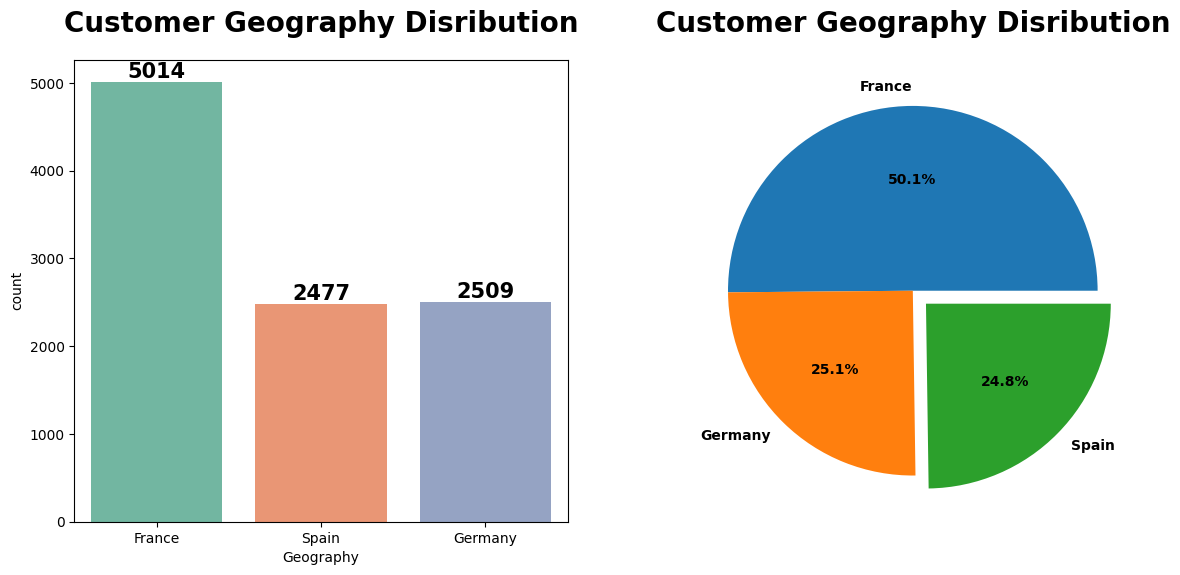

In [7]:
count = data["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=data, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

## 5. Scatter matrix & Correlation Matrix

<Figure size 1200x1000 with 0 Axes>

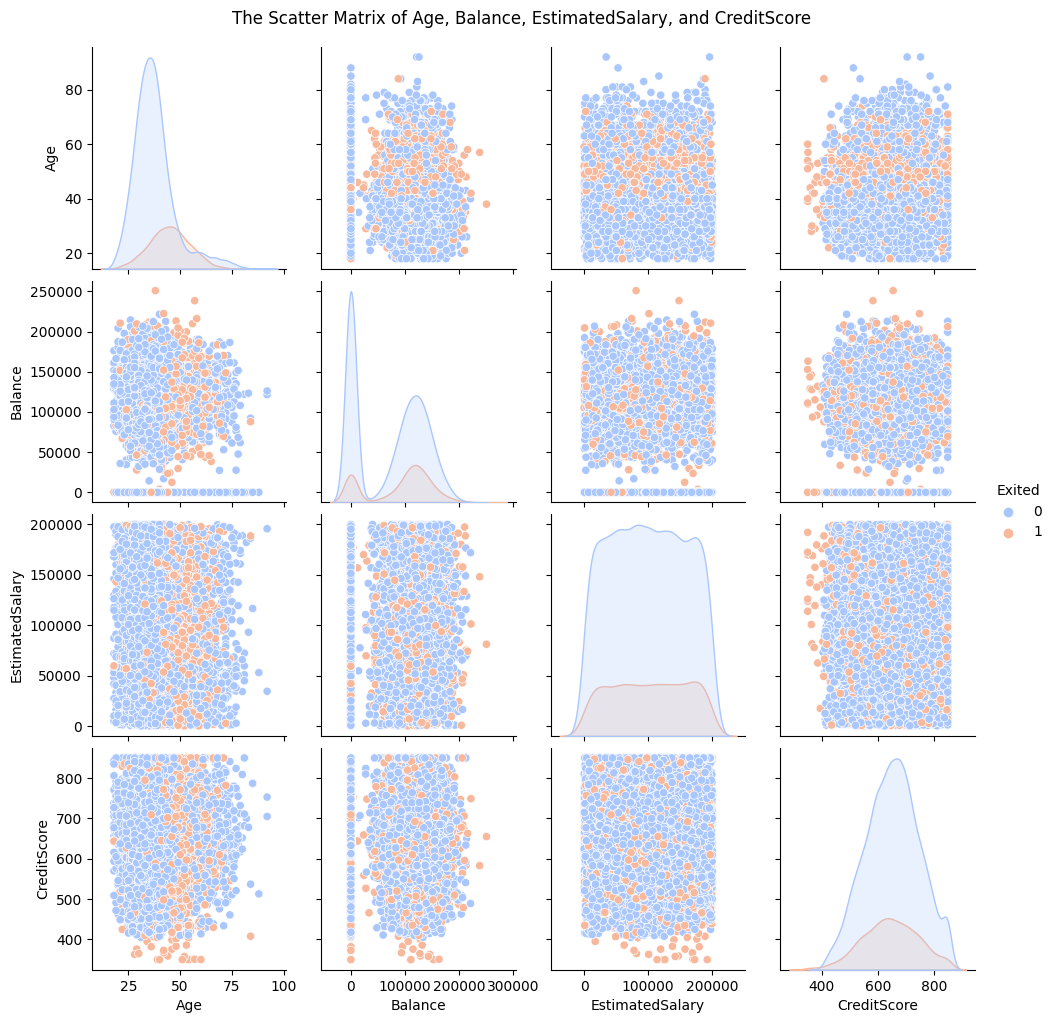

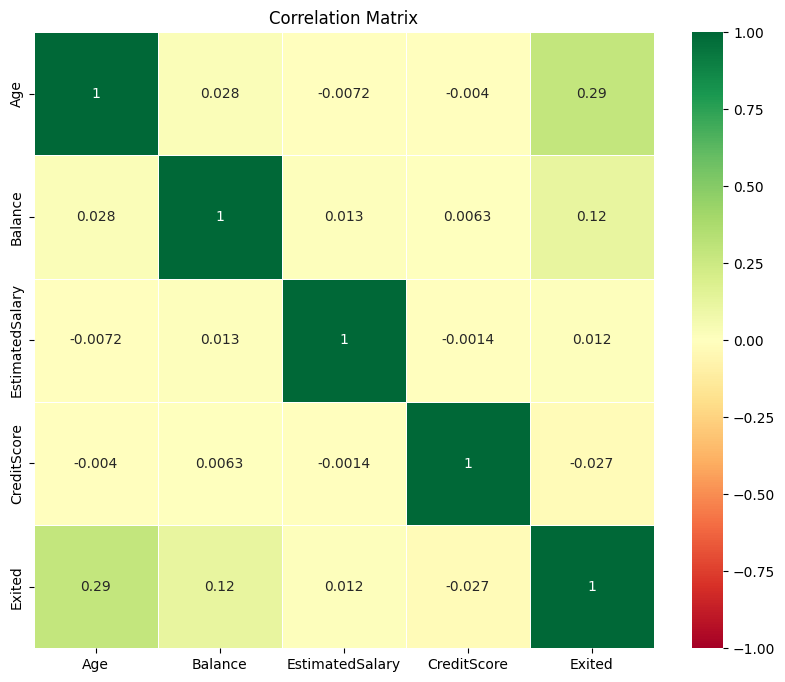

In [8]:

# Biểu đồ ma trận phân tán (Scatter Matrix)
plt.figure(figsize=(12, 10))
sns.pairplot(data[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']], hue='Exited', palette='coolwarm')
plt.suptitle('The Scatter Matrix of Age, Balance, EstimatedSalary, and CreditScore', y=1.02)
plt.show()

# Ma trận tương quan (Correlation Matrix)
plt.figure(figsize=(10, 8))
corr_matrix = data[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Exited']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 6. Visualizing the churn rate

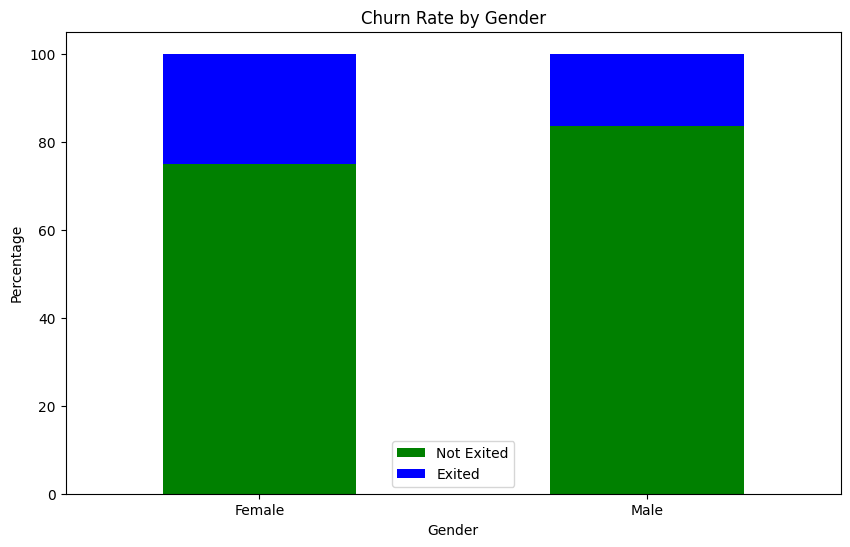

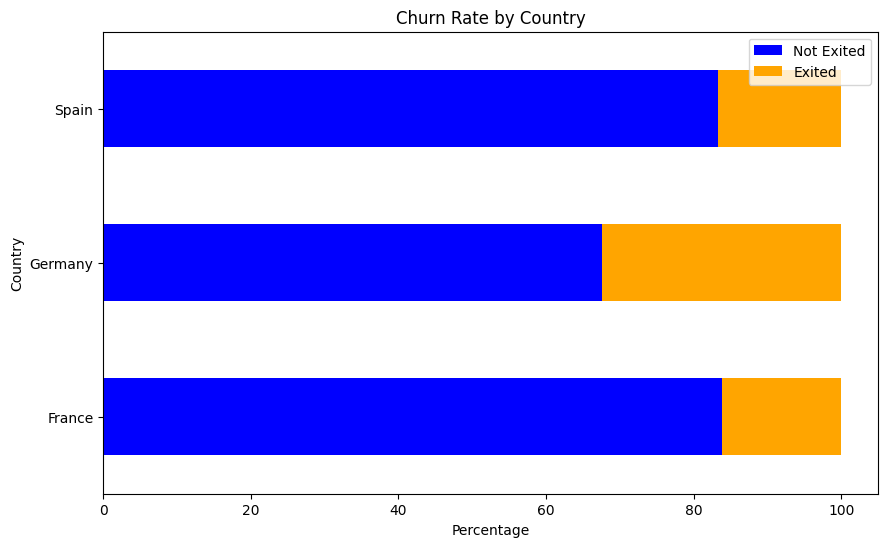

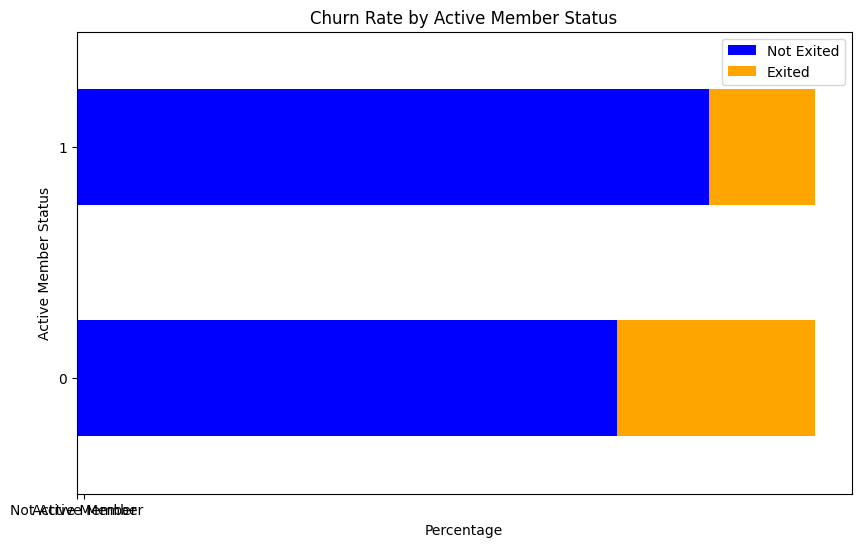

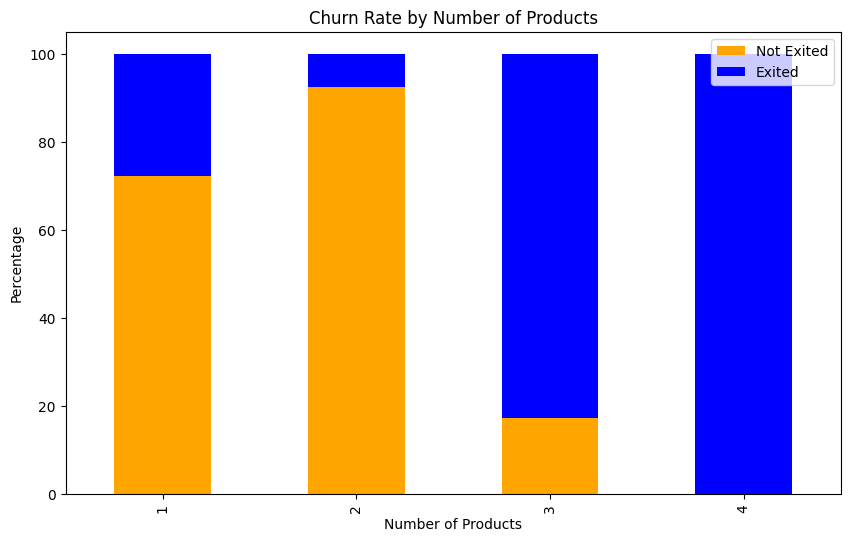

In [9]:
# (a) Churn Rate by Gender
plt.figure(figsize=(10, 6))
gender_churn = data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack() * 100
gender_churn.plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (b) Churn Rate by Country
plt.figure(figsize=(10, 6))
country_churn = data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack() * 100
country_churn.plot(kind='barh', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title('Churn Rate by Country')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (c) Churn Rate by Active Member Status
plt.figure(figsize=(10, 6))
active_churn = data.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack() * 100
active_churn.plot(kind='barh', stacked=True, color=['blue', 'orange'], ax=plt.gca())
plt.title('Churn Rate by Active Member Status')
plt.xlabel('Percentage')
plt.ylabel('Active Member Status')
plt.xticks([0, 1], ['Not Active Member', 'Active Member'])
plt.legend(['Not Exited', 'Exited'])
plt.show()

# (d) Churn Rate by Number of Products
plt.figure(figsize=(10, 6))
products_churn = data.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack() * 100
products_churn.plot(kind='bar', stacked=True, color=['orange', 'blue'], ax=plt.gca())
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Percentage')
plt.legend(['Not Exited', 'Exited'])
plt.show()

# II. Data preparation

## 1. Encoder data

In [10]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])


# Khởi tạo OneHotEncoder với tham số drop='first' để loại bỏ một cột
encoder = OneHotEncoder(sparse_output=False)

# Mã hóa cột 'Geography'
geography_encoded = encoder.fit_transform(data[['Geography']])


# Tạo DataFrame từ kết quả mã hóa
geography_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['Geography']))

# Ghép các cột đã mã hóa vào DataFrame gốc và loại bỏ cột gốc 'Geography'
data = pd.concat([data.drop('Geography', axis=1), geography_df], axis=1)

## 2. Drop Unneeded Columns

In [11]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [12]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


## 3. Define Features X and Target y

In [13]:
x_var = data.columns[data.columns != 'Exited']

y_var = ["Exited"]

In [14]:
X = data[x_var]
y = data[y_var]

In [15]:
X.shape

(10000, 12)

In [16]:
y.shape

(10000, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# III. Improve

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [19]:
# Số lượng folds
n_folds = 5

# K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

In [20]:
# Tạo mô hình ANN (Meta-Learner)
def create_meta_learner():
    model = Sequential([
        Dense(6, activation='relu', input_dim=len(base_learners)),  # Hidden Layer 1
        Dense(6, activation='relu'),  # Hidden Layer 2
        Dense(1, activation='sigmoid')  # Output Layer
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Lớp ANN Meta-Learner
class ANNMetaLearner(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=100, batch_size=10):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = create_meta_learner()

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int).flatten()  # Chuyển xác suất thành nhãn 0/1
    def predict_proba(self, X):
        probabilities = self.model.predict(X)  # Xác suất dự đoán
        return np.column_stack((1 - probabilities, probabilities))  # Trả về xác suất cho cả hai lớp (0 và 1)

In [21]:
# Tính toán trọng số cho từng lớp
from collections import Counter

counter = Counter(y_train)
majority_class = max(counter, key=counter.get)
minority_class = min(counter, key=counter.get)
total_samples = len(y_train)

# Tính toán class_weight cho 'balanced'
class_weight = {cls: total_samples / (len(counter) * count) for cls, count in counter.items()}

# Tính toán scale_pos_weight cho XGBoost
scale_pos_weight = counter[majority_class] / counter[minority_class]

In [22]:
# Cập nhật base_learners với trọng số lớp
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42, class_weight='balanced')),
    ('gnb', GaussianNB()),  # GaussianNB không hỗ trợ class_weight
    ('knn', KNeighborsClassifier(n_neighbors=5)),  # KNN không hỗ trợ class_weight
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42, scale_pos_weight=scale_pos_weight)),
    ('logreg', LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'))
]

# Tạo ANN Meta-Learner
meta_learner = ANNMetaLearner(epochs=200, batch_size=10)

In [23]:
# Để lưu trữ kết quả
accuracy_scores = []
f1_scores = []
auc_scores = []

# Lặp qua từng fold
for train_index, test_index in kf.split(X, y):
    # Chia dữ liệu sử dụng iloc
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Khởi tạo StandardScaler cho mỗi fold
    scaler = StandardScaler()

    # Fit scaler trên dữ liệu huấn luyện và biến đổi
    X_train_scaled = scaler.fit_transform(X_train)

    # Biến đổi dữ liệu kiểm tra
    X_test_scaled = scaler.transform(X_test)

    # Cập nhật base_learners trong mỗi fold (nếu cần)
    base_learners_fold = base_learners.copy()

    # Tạo mô hình stacking
    stacking_model = StackingClassifier(
        estimators=base_learners_fold,
        final_estimator=meta_learner,
        cv=5,  # Cross-validation cho các base learners
        stack_method='predict_proba'
    )

    # Huấn luyện mô hình trên dữ liệu đã được scale
    stacking_model.fit(X_train_scaled, y_train)

    # Dự đoán trên dữ liệu kiểm tra đã được scale
    y_pred = stacking_model.predict(X_test_scaled)
    y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]  # Xác suất cho lớp 1 (cần cho AUC)

    # Đánh giá
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=0, average='binary')
    auc = roc_auc_score(y_test, y_pred_proba)

    # Lưu kết quả
    accuracy_scores.append(acc)
    f1_scores.append(f1)
    auc_scores.append(auc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
# Tính trung bình và độ lệch chuẩn
accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores)
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# In ra kết quả
print("\n--- Kết quả cuối cùng ---")
print(f"Accuracy trung bình: {accuracy_mean:.2f}, Độ lệch chuẩn: {accuracy_std:.2f}")
print(f"F1-Score trung bình: {f1_mean:.2f}, Độ lệch chuẩn: {f1_std:.2f}")
print(f"AUC trung bình: {auc_mean:.2f}, Độ lệch chuẩn: {auc_std:.2f}")


--- Kết quả cuối cùng ---
Accuracy trung bình: 0.91, Độ lệch chuẩn: 0.01
F1-Score trung bình: 0.93, Độ lệch chuẩn: 0.00
AUC trung bình: 0.92, Độ lệch chuẩn: 0.01
